<a href="https://colab.research.google.com/github/aflores/samples/blob/master/covid01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Covid-19 data

Just playing with Pandas using the data provided by:

 https://covidtracking.com/
 
## Things to try
 
 - Read data directly from the project's URL
 - Plot data to observe trends
 

## Journal

### 20MAR

  Initial setup.
  I got HTTP 403 when attempting to retrieve the date via URL but using the browser worked ok.
  So I saved the day's data to get going
  
 
### 21MAR

  Continue to have issues with HTTP retrieval (added comment to a similar Github issue)
  Created a function to plot the daily trend of positive, negavite, pending(testing) and deaths
  
  Plotting is not working as I expected:
  - Using 'date' in the x-axis interprets the axis as a large integer
  - Using 'dateChecked', shows the data in descending order
  :-o
  
  
 ### 22MAR
 
   On the plotting issues
   - type 'scatter' requires an numeric x-axis so by using dateChecked the plot is not 'sorted'
  
  
  
  
  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
data_url = "https://covidtracking.com/api/states/daily"
#data_url = "https://covid.cape.io/states/daily" # per webmasterkai github  - fixed in issue 7
data_file = "/Users/aflores/projects/ml/covid-19/data/states/daily-latest.json"
# !ls /Users/aflores/projects/ml/covid-19/data/states
# !ln -sf

In [0]:
#daily = pd.read_json(data_file, convert_dates=True)
daily = pd.read_json(data_url)

In [4]:
# show the columns data type
print(daily.dtypes)

date              int64
state            object
positive        float64
negative        float64
pending         float64
hospitalized    float64
death           float64
total             int64
dateChecked      object
dtype: object


In [0]:
# upon reading the data, the date column looks like a number
# but I rather use it as a string so we can show it in the x-axis
daily = daily.astype({"date": str})
#print(daily.dtypes)

In [0]:
def plot_state (state='FL', df=daily, hide_pending=False, hide_negative=False, hide_positive=False, hide_death=False):
    """ Plot daily trends for a single state """

    daily_tmp = df[daily['state'] == state]
    daily_tmp = daily_tmp.sort_values(by=['date'])
    
    x_axis = 'date' # date or dateChecked
    plot_kind = 'line' # type of plot
 
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('count')
    
    if (hide_positive == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='positive',color='red')
    
    if (hide_negative == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='negative',color='green')
    
    if (hide_pending == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='pending',color='blue')
    
    # this will be shown on the y-axis on the right side
    if (hide_death == False):
        ax2 = ax1.twinx()
        ax2.set_ylabel('deaths')
        daily_tmp.plot(kind=plot_kind ,x=x_axis, ax=ax2, y='death',color='black', legend=False)
    
    plt.title(state)
    plt.setp(ax1.get_xticklabels(),rotation='90')
    ax1.grid(linestyle='--')
    
    fig.set_size_inches(10,8)
    fig.tight_layout() 
    
    plt.show()

# test the function    
#plot_state_dual_y(state='NY', hide_pending=True)

In [0]:
def state_pct_change(df_full, state, num_days, col_name):
    df = df_full[df_full['state']== state].head(num_days).sort_values('date',ascending=False)
    row_count = len(df.index)
    ref_value = df.iloc[row_count-1][col_name]
    current_value = df.iloc[0][col_name]
    pct =  (current_value - ref_value)/ref_value
    return (col_name, num_days, pct, current_value)

# varx = state_pct_change(daily,'FL',5,'positive')
# print('The current value for "{0[0]}" is "{0[3]}" representing a {0[2]:3.1%} change over {0[1]} days.'.format(varx))

In FL, the current value for "positive" is: 830.0 representing a 26% change over 2 days.
In FL, the current value for "death" is: 13.0 representing a  8% change over 2 days.
In NY, the current value for "positive" is: 15,168.0 representing a 46% change over 2 days.
In NY, the current value for "death" is: 114.0 representing a 159% change over 2 days.
In CA, the current value for "positive" is: 1,536.0 representing a 20% change over 2 days.
In CA, the current value for "death" is: 27.0 representing a 12% change over 2 days.
In WA, the current value for "positive" is: 1,793.0 representing a 18% change over 2 days.
In WA, the current value for "death" is: 94.0 representing a 13% change over 2 days.


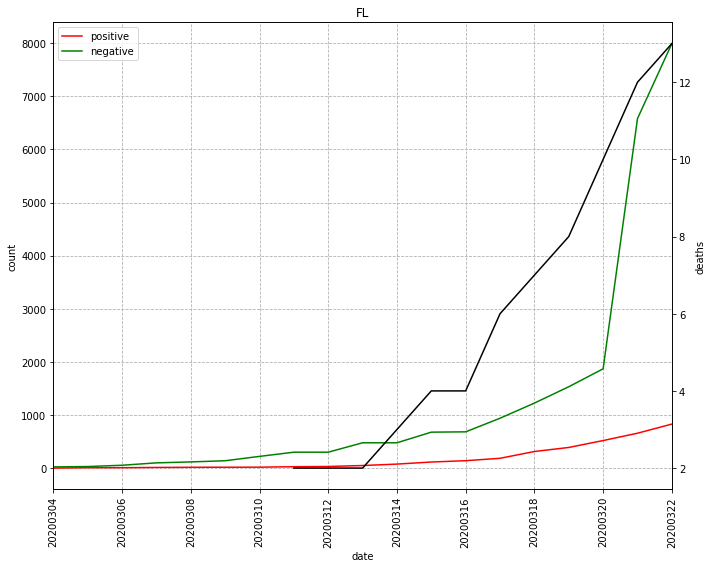

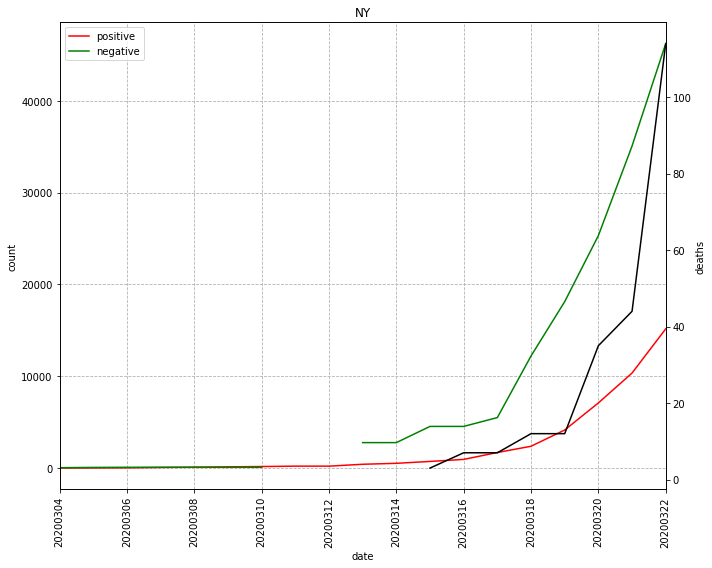

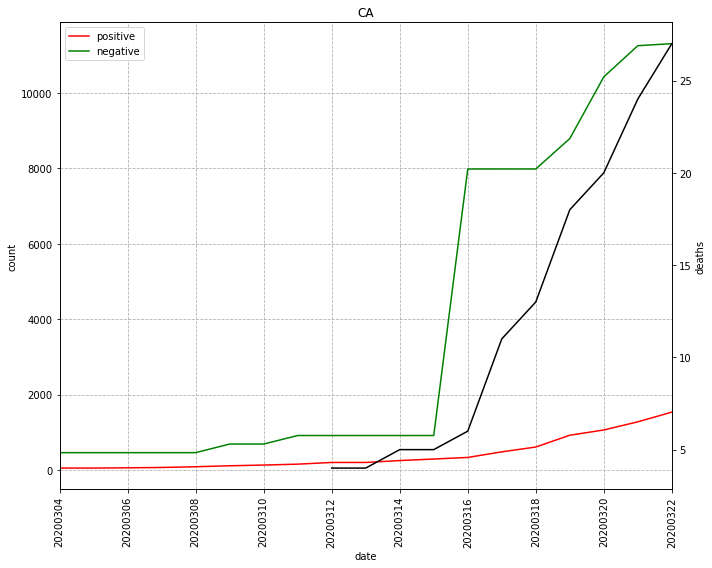

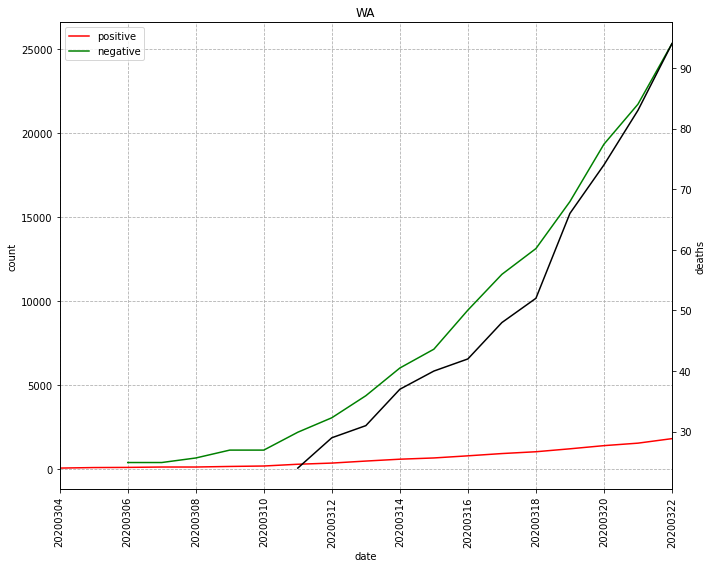

In [8]:
fmt_str = 'In {1}, the current value for "{0[0]}" is: {0[3]:,} representing a {0[2]:3.0%} change over {0[1]:d} days.'

states = ('FL','NY','CA','WA')
for st in states:
    print(fmt_str.format(state_pct_change(daily,st,2,'positive'),st))
    print(fmt_str.format(state_pct_change(daily,st,2,'death'),st))
for st in ('FL','NY','CA','WA'):    
    plot_state(st,hide_pending=True)

In [9]:
daily[daily['state'] == 'NY']

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
37,20200322,NY,15168.0,46233.0,NaN,1974.0,114.0,61401,2020-03-22T20:00:00Z
93,20200321,NY,10356.0,35081.0,NaN,1603.0,44.0,45437,2020-03-21T20:00:00Z
149,20200320,NY,7102.0,25325.0,NaN,NaN,35.0,32427,2020-03-20T20:00:00Z
205,20200319,NY,4152.0,18132.0,NaN,NaN,12.0,22284,2020-03-19T20:00:00Z
258,20200318,NY,2382.0,12215.0,NaN,NaN,12.0,14597,2020-03-18T20:00:00Z
314,20200317,NY,1700.0,5506.0,NaN,NaN,7.0,7206,2020-03-17T20:00:00Z
370,20200316,NY,950.0,4543.0,NaN,NaN,7.0,5493,2020-03-16T20:00:00Z
426,20200315,NY,729.0,4543.0,NaN,NaN,3.0,5272,2020-03-15T20:00:00Z
477,20200314,NY,524.0,2779.0,NaN,NaN,NaN,3303,2020-03-14T20:00:00Z
528,20200313,NY,421.0,2779.0,NaN,NaN,NaN,3200,2020-03-13T20:00:00Z
